<a href="https://colab.research.google.com/github/SanjaraT/Predicting-Diabetes/blob/main/DiabetesPred_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Loading Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

df.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Handling Missing Values

In [ ]:
for column in df.columns:
    num_zeros = (df[column] == 0).sum()
    print(f"Number of 0 values in '{column}': {num_zeros}")

Number of 0 values in 'Pregnancies': 111
Number of 0 values in 'Glucose': 5
Number of 0 values in 'BloodPressure': 35
Number of 0 values in 'SkinThickness': 227
Number of 0 values in 'Insulin': 374
Number of 0 values in 'BMI': 11
Number of 0 values in 'DiabetesPedigreeFunction': 0
Number of 0 values in 'Age': 0
Number of 0 values in 'Outcome': 500


In [ ]:
# Calculate the median of non-zero values in the 'Insulin' column
Glucose_median = df[df['Glucose'] != 0]['Glucose'].median()
BloodPressure_median = df[df['BloodPressure'] != 0]['BloodPressure'].median()
BMI_median = df[df['BMI'] != 0]['BMI'].median()

# Replace 0 values in the 'Insulin' column with the median
df['Glucose'] = df['Glucose'].replace(0, Glucose_median)
df['BloodPressure'] = df['BloodPressure'].replace(0, BloodPressure_median)
df['BMI'] = df['BMI'].replace(0, BMI_median)


In [ ]:
for column in df.columns:
    num_zeros = (df[column] == 0).sum()
    print(f"Number of 0 values in '{column}': {num_zeros}")

Number of 0 values in 'Pregnancies': 111
Number of 0 values in 'Glucose': 0
Number of 0 values in 'BloodPressure': 0
Number of 0 values in 'SkinThickness': 227
Number of 0 values in 'Insulin': 374
Number of 0 values in 'BMI': 0
Number of 0 values in 'DiabetesPedigreeFunction': 0
Number of 0 values in 'Age': 0
Number of 0 values in 'Outcome': 500


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Histogram

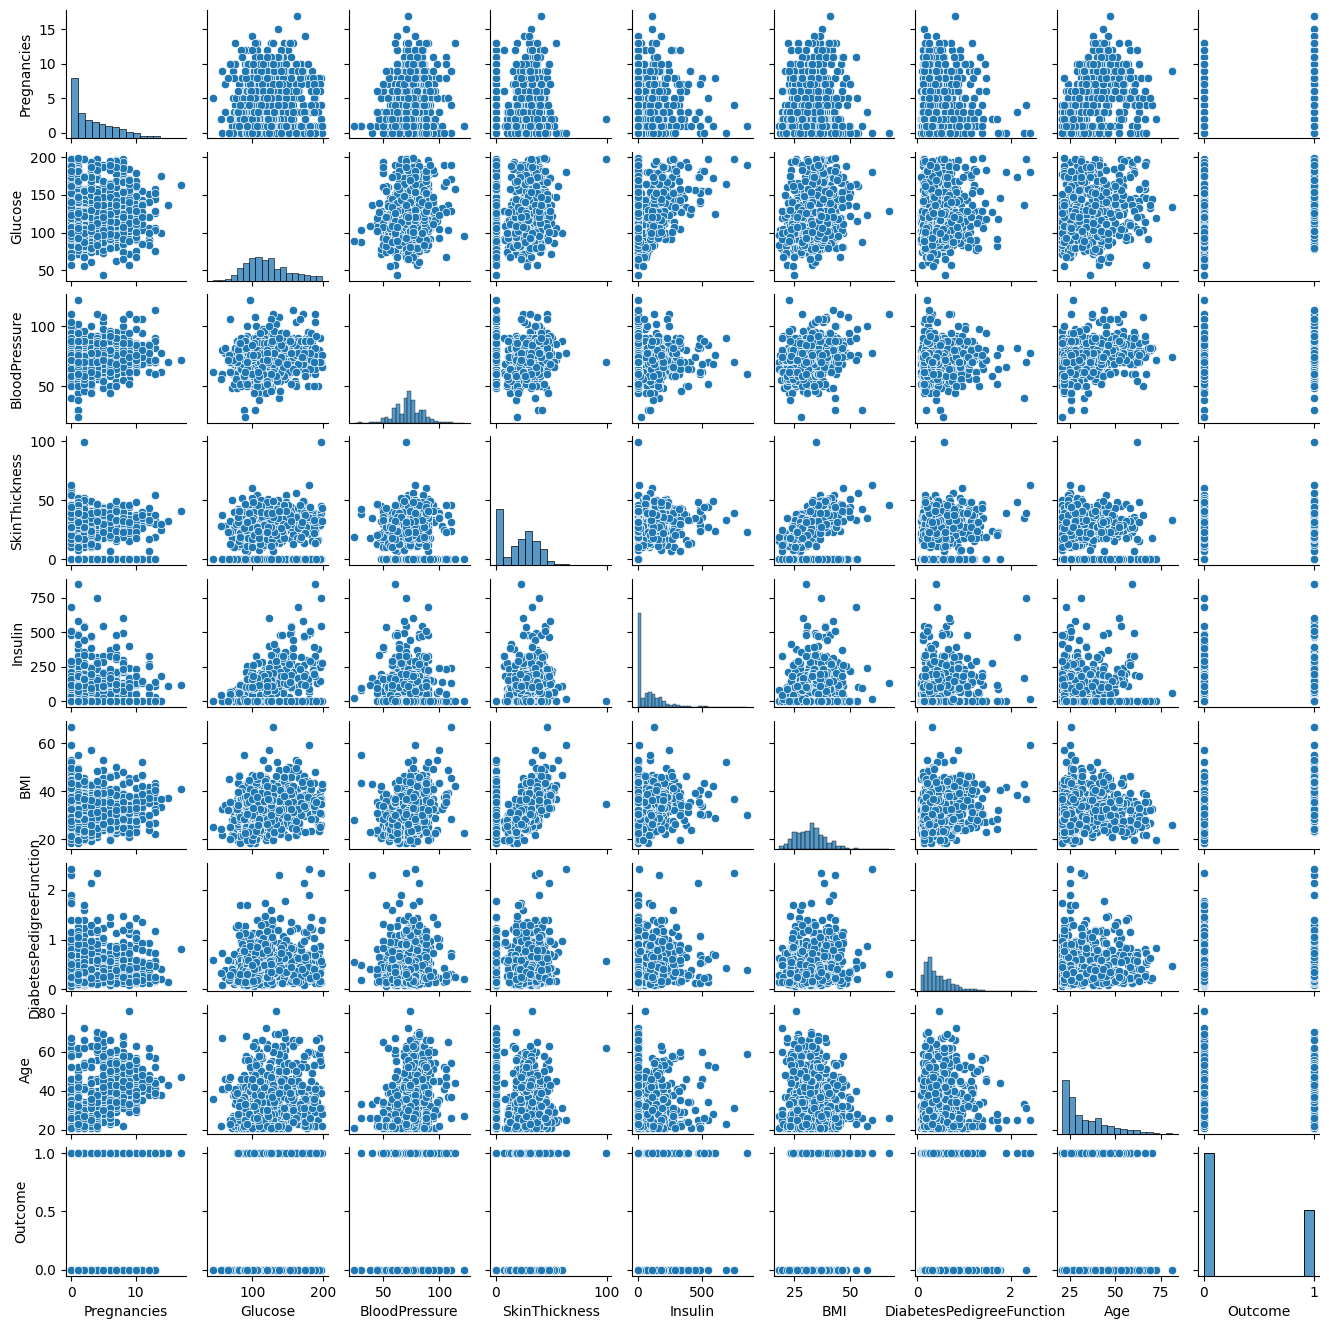

In [ ]:
sns.pairplot(df, height=1.5);
plt.show()


In [ ]:
df.shape

(768, 9)

#Original Class Distribution

Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


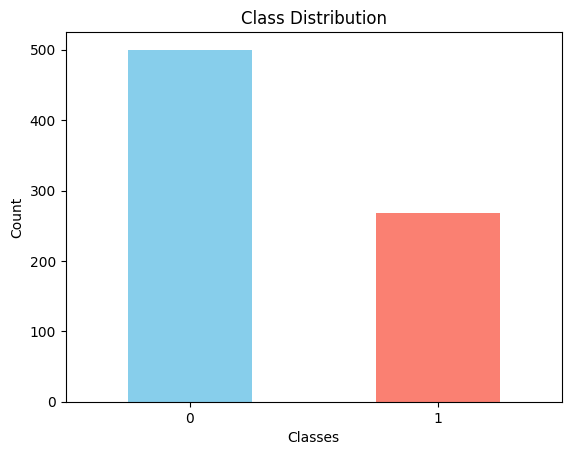

In [ ]:
class_distribution = df['Outcome'].value_counts()

# Display the distribution
print("Class Distribution:")
print(class_distribution)

# Plot the class distribution for better visualization
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Check if dataset is imbalanced
total = class_distribution.sum()
imbalanced = any(class_distribution / total < 0.2)  # Example threshold, adjust as needed


#Correlation

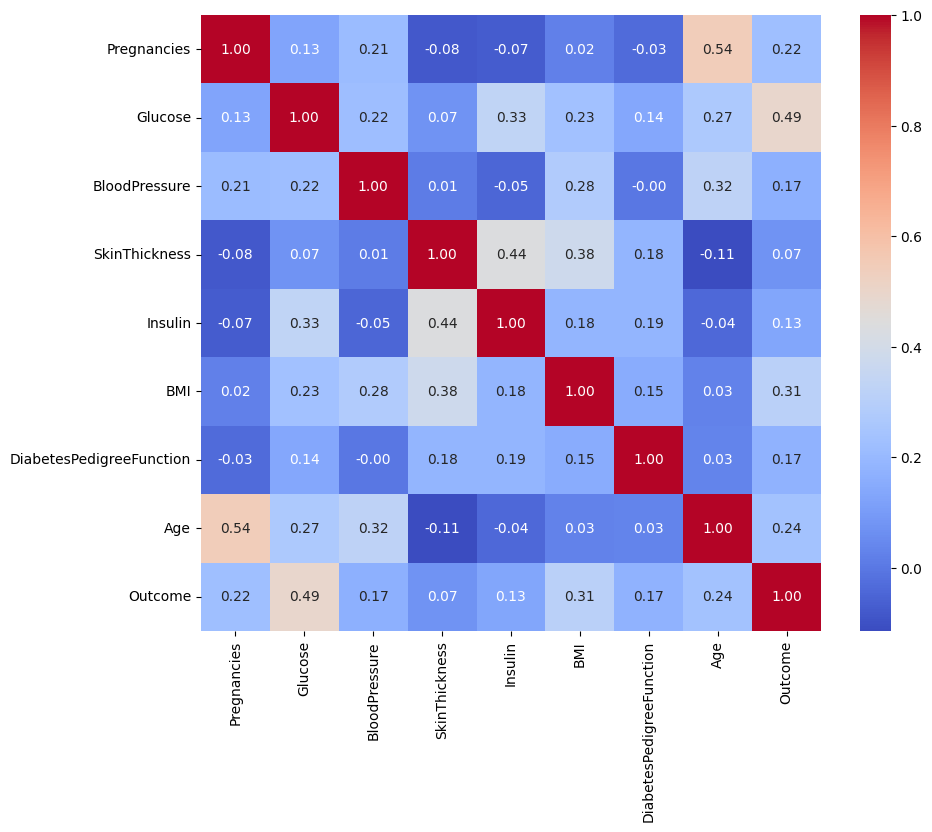

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap ='coolwarm', fmt=".2f")
plt.show()

#Outlier Visualization

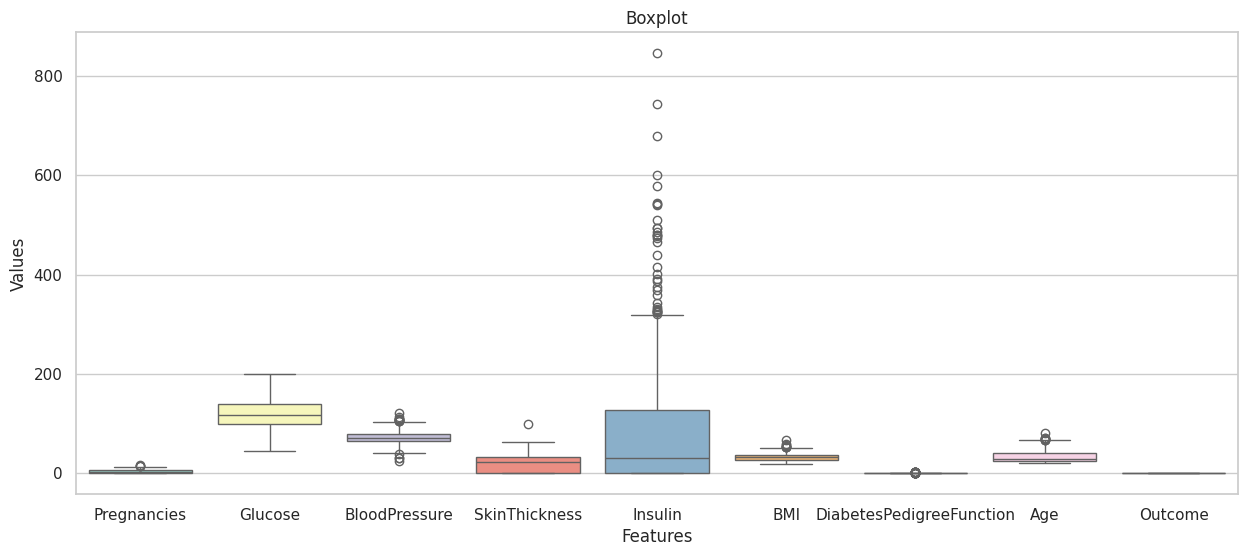

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(15, 6))
sns.boxplot(data=df, palette="Set3")


plt.title("Boxplot")
plt.xlabel("Features")
plt.ylabel("Values")


plt.show()

#Handling Outlier

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)


---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.75000
BloodPressure               64.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.50000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      40.5000
BloodPressure                16.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.1000
DiabetesPedigr

In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((768, 9), (675, 9))

#Rules

#Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the entire DataFrame
df_out_scaled = scaler.fit_transform(df_out)

# Convert the scaled data back to a DataFrame
df_out_scaled = pd.DataFrame(df_out_scaled, columns=df_out.columns, index=df_out.index)

In [ ]:
df_out_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.689786,1.003937,-0.001919,0.986836,-0.787485,0.250280,0.799207,1.605264,1.452790
1,-0.848897,-1.176807,-0.557180,0.600608,-0.787485,-0.844088,-0.302572,-0.134869,-0.688331
2,1.305259,2.215462,-0.742267,-1.266160,-0.787485,-1.360004,0.978845,-0.043283,1.452790
3,-0.848897,-1.038347,-0.557180,0.214380,0.409218,-0.609580,-1.037092,-1.050728,-0.688331
5,0.382049,-0.103742,0.183167,-1.266160,-0.787485,-1.000426,-0.901366,-0.226455,-0.688331
...,...,...,...,...,...,...,...,...,...
763,1.920732,-0.622967,0.368254,1.823663,1.504073,0.140843,-1.021124,2.795881,-0.688331
764,-0.541160,0.103948,-0.187006,0.471865,-0.787485,0.750563,-0.346484,-0.501213,-0.688331
765,0.382049,0.069333,-0.001919,0.214380,0.638373,-0.906623,-0.725720,-0.226455,-0.688331
766,-0.848897,0.242408,-1.112440,-1.266160,-0.787485,-0.296904,-0.310556,1.330506,1.452790


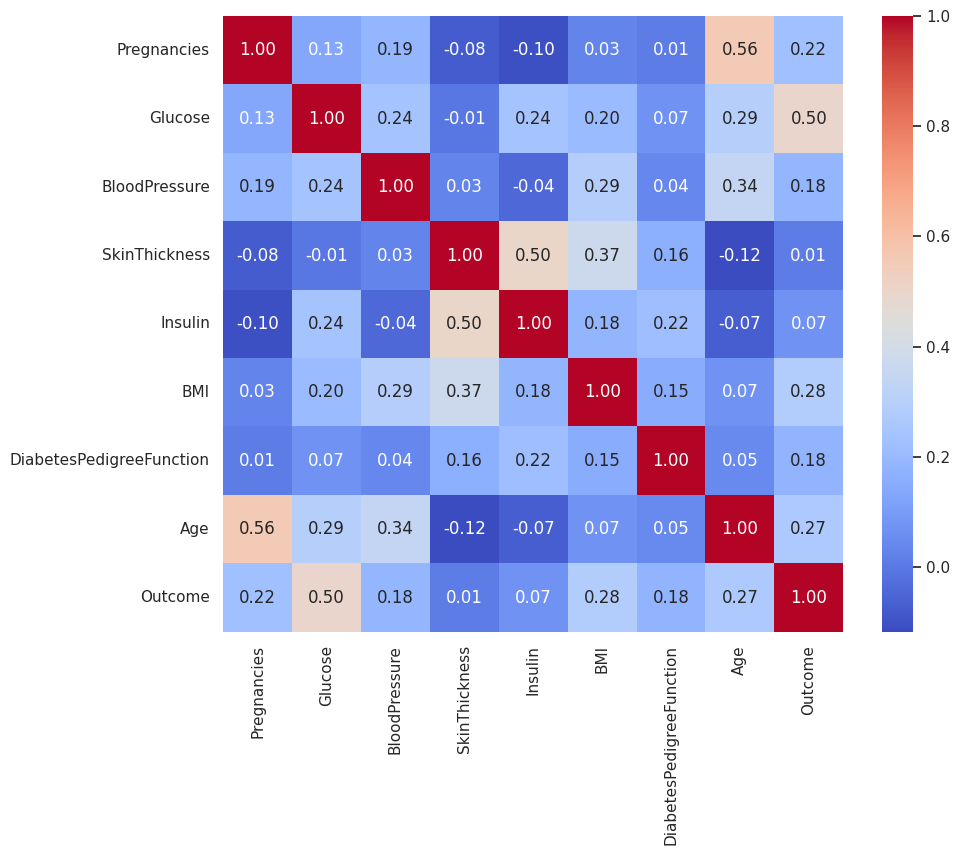

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_out_scaled.corr(), annot=True, cmap ='coolwarm', fmt=".2f")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#Class Distribution After Applying SMOTE

Class distribution before SMOTE:
Outcome
0    366
1    174
Name: count, dtype: int64

Class distribution after SMOTE:
Outcome
1    366
0    366
Name: count, dtype: int64


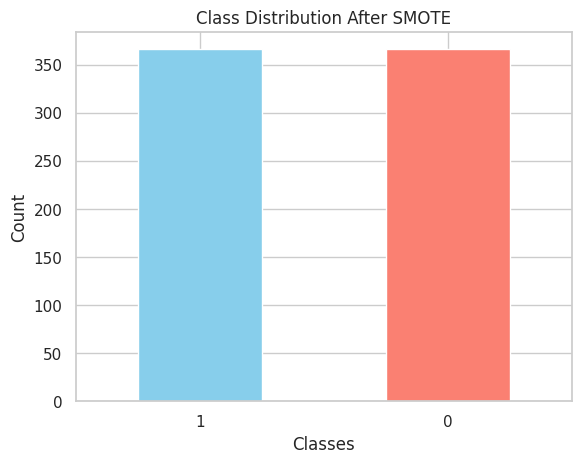

In [ ]:
X = df_out_scaled.drop(columns=['Outcome'])
y = df_out['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' will balance all classes
X_res, y_res = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_res).value_counts())

# Optionally, you can visualize the class distribution after applying SMOTE:
import matplotlib.pyplot as plt

pd.Series(y_res).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#Feature Engineering
 --multiplying each feature by a weight and sum them up.
The weights (0.5, 0.3, 0.1, 0.1) represent the relative importance of each feature.

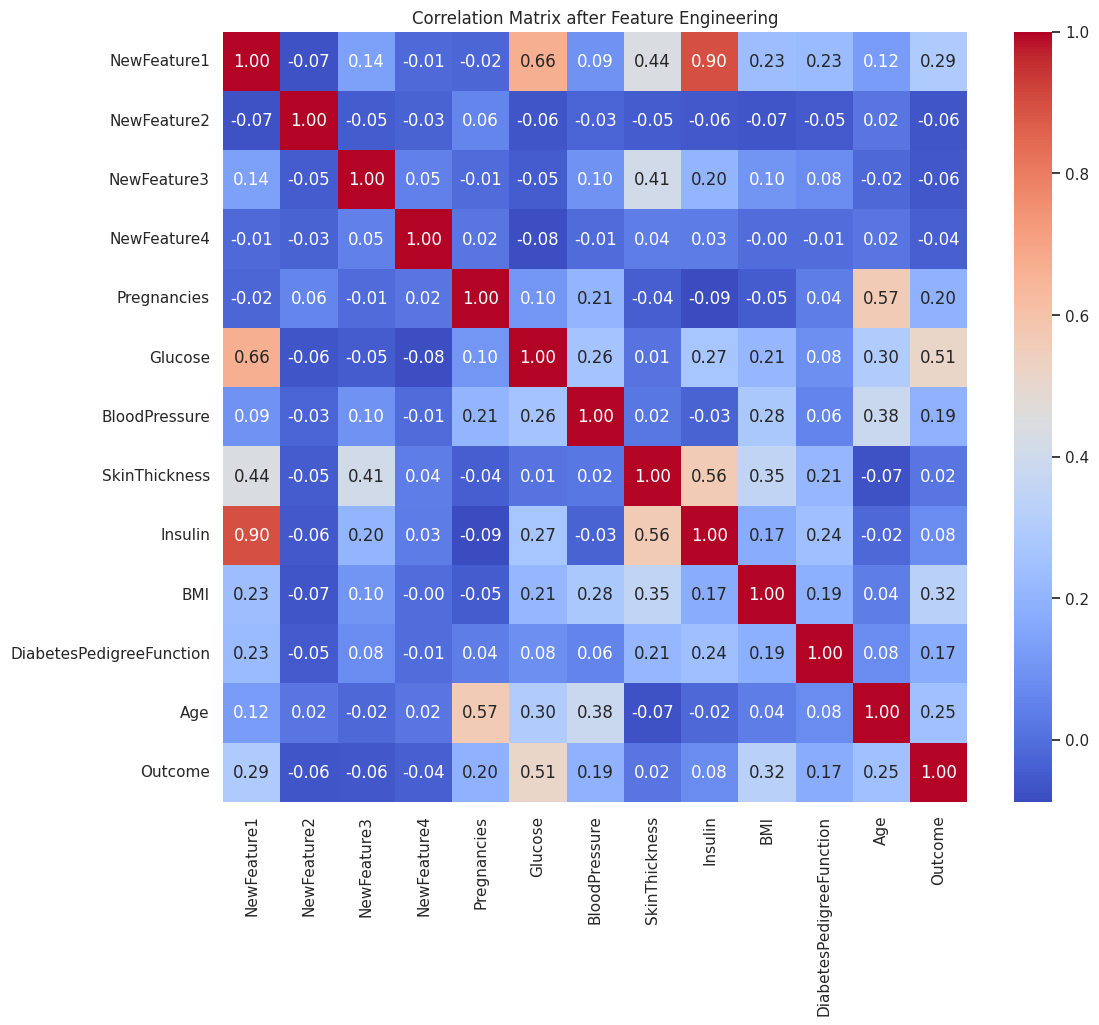

In [ ]:
# Generate new features
X_res['NewFeature1'] = 0.5 * X_res['Insulin'] + 0.3 * X_res['Glucose']  # Focus on Insulin and Glucose
X_test['NewFeature1'] = 0.5 * X_test['Insulin'] + 0.3 * X_test['Glucose']

X_res['NewFeature2'] = X_res['BMI'] / X_res['Age']  # BMI relative to Age
X_test['NewFeature2'] = X_test['BMI'] / X_test['Age']

X_res['NewFeature3'] = X_res['SkinThickness'] * X_res['BMI']  # SkinThickness and BMI interaction
X_test['NewFeature3'] = X_test['SkinThickness'] * X_test['BMI']

X_res['NewFeature4'] = X_res['Glucose'] / (X_res['Insulin'] + 1e-6)  # Glucose to Insulin ratio with smoothing
X_test['NewFeature4'] = X_test['Glucose'] / (X_test['Insulin'] + 1e-6)

# Select features for training (including engineered features)
features = ['NewFeature1', 'NewFeature2', 'NewFeature3', 'NewFeature4',
            'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_train_final = X_res[features]
y_train_final = y_res
X_test_final = X_test[features]
y_test_final = y_test


# Create a DataFrame for correlation calculation
correlation_df = X_train_final.copy()  # Use X_train_final or X_test_final
correlation_df['Outcome'] = y_train_final  # Use y_train_final or y_test_final

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix after Feature Engineering")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import randint, uniform
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42, probability=True),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

Hyperparameter tuning for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best parameters for Logistic Regression: {'C': 3.7554011884736247, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Confusion Matrix:
 [[282  84]
 [ 91 275]]
Classification Report:
                     0           1  accuracy   macro avg  weighted avg
precision    0.756032    0.766017  0.760929    0.761024      0.761024
recall       0.770492    0.751366  0.760929    0.760929      0.760929
f1-score     0.763194    0.758621  0.760929    0.760907      0.760907
support    366.000000  366.000000  0.760929  732.000000    732.000000
Accuracy: 0.7609

--------------------------------------------------

Hyperparameter tuning for SVM...
Best parameters for SVM: {'C': 4.468327528535911, 'kernel': 'rbf'}
SVM Confusion Matrix:
 [[281  85]
 [ 78 288]]
Classification Report:
                     0           1  accuracy   macro avg  weighted avg
precision    0.782730    0.772118  0.777322    0.777424      0.777424
recall       0.767760    0.786885  0.777322    0.777322      0.777322
f1-scor

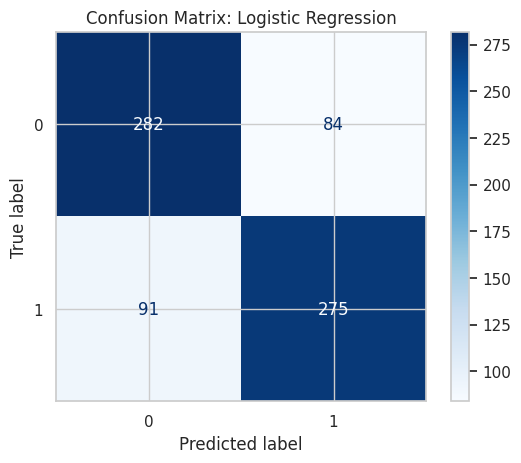

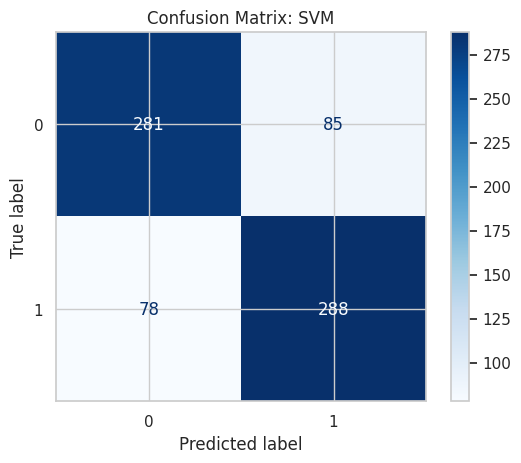

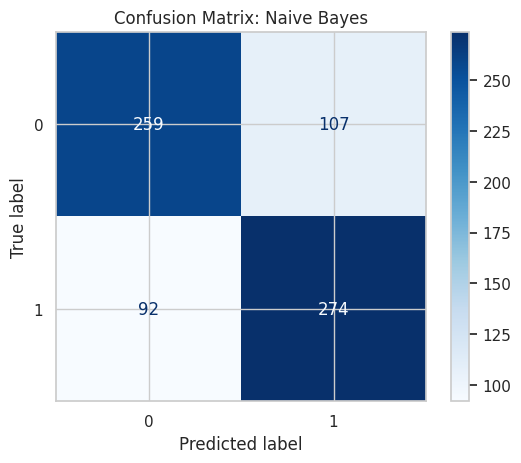

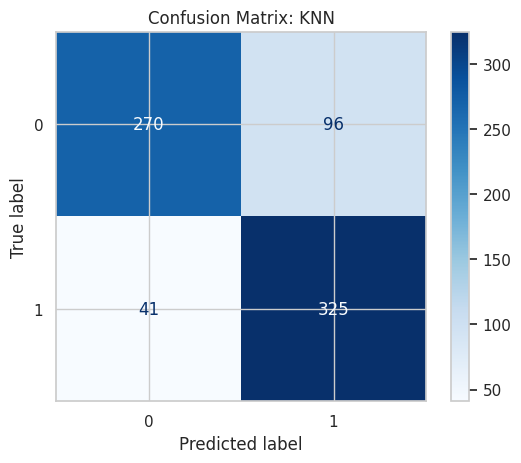

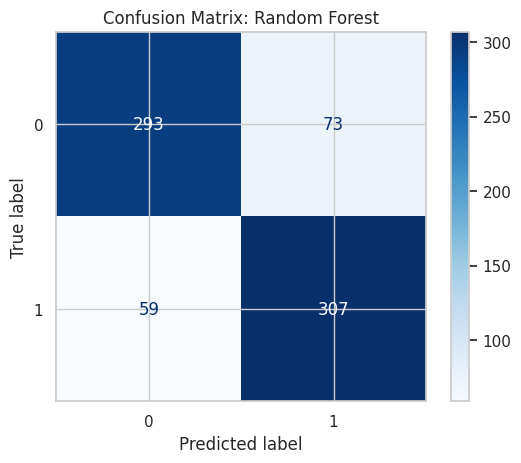

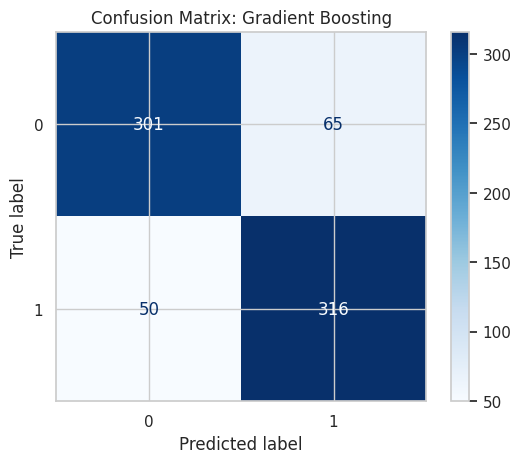

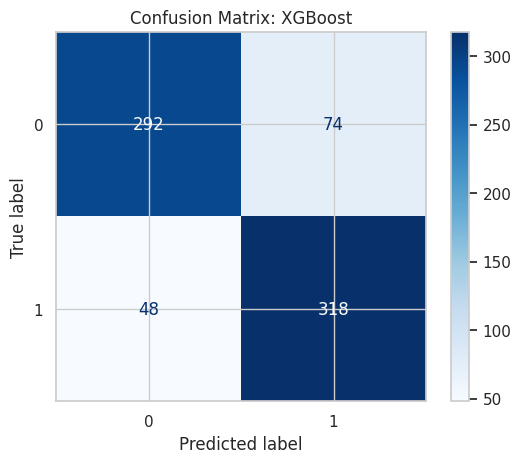

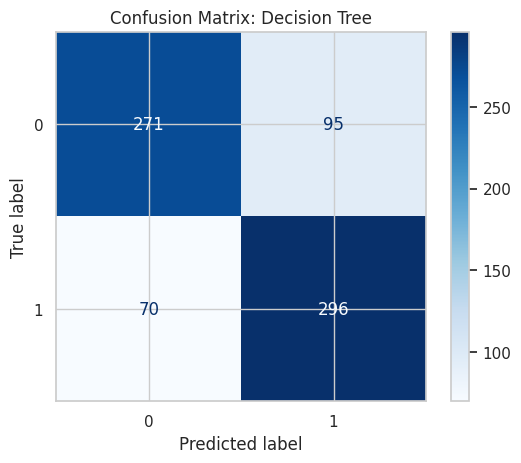

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd

# Define parameter grids for hyperparameter tuning
param_grids = {
    "Logistic Regression": {
        "C": uniform(0.01, 10),
        "penalty": ["l2", "l1", "elasticnet"],
        "solver": ["liblinear", "saga"],
    },
    "SVM": {
        "C": uniform(0.01, 10),
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
    },
    "Naive Bayes": {},  # No hyperparameters to tune for GaussianNB
    "KNN": {
        "n_neighbors": randint(1, 50),
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"],
    },
    "Random Forest": {
        "n_estimators": randint(50, 300),
        "max_depth": randint(1, 20),
        "min_samples_split": randint(2, 20),
        "min_samples_leaf": randint(1, 20),
    },
    "Gradient Boosting": {
        "n_estimators": randint(50, 300),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": randint(1, 20),
        "min_samples_split": randint(2, 20),
        "min_samples_leaf": randint(1, 20),
    },
    "XGBoost": {
        "n_estimators": randint(50, 300),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": randint(1, 20),
        "subsample": uniform(0.5, 0.5),
        "colsample_bytree": uniform(0.5, 0.5),
    },
    "Decision Tree": {  # Added grid for Decision Tree
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": randint(1, 20),
        "min_samples_split": randint(2, 20),
        "min_samples_leaf": randint(1, 20),
    }

}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}
confusion_matrices = {}

for name, model in models.items():
    print(f"Hyperparameter tuning for {name}...")

    if name in param_grids and param_grids[name]:  # Only tune models with parameters
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[name],
            n_iter=20,  # Number of configurations to try
            cv=kf,
            scoring="accuracy",
            random_state=42,
            n_jobs=-1
        )
        random_search.fit(X_train_final, y_train_final)
        best_model = random_search.best_estimator_
        print(f"Best parameters for {name}: {random_search.best_params_}")
    else:
        best_model = model

    # Perform cross-validation predictions with the best model
    y_pred = cross_val_predict(best_model, X_train_final, y_train_final, cv=kf)

    # Confusion matrix
    cm = confusion_matrix(y_train_final, y_pred)
    confusion_matrices[name] = cm

    # Classification report
    report = classification_report(y_train_final, y_pred, output_dict=True)
    accuracy = report["accuracy"]
    results[name] = accuracy

    # Print confusion matrix and classification report
    print(f"{name} Confusion Matrix:\n", cm)
    print(f"Classification Report:\n", pd.DataFrame(report))
    print(f"Accuracy: {accuracy:.4f}")
    print("\n" + "-" * 50 + "\n")

# Display final results
print("Final Model Accuracies:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Optionally, visualize confusion matrices
import matplotlib.pyplot as plt

for name, cm in confusion_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train_final))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

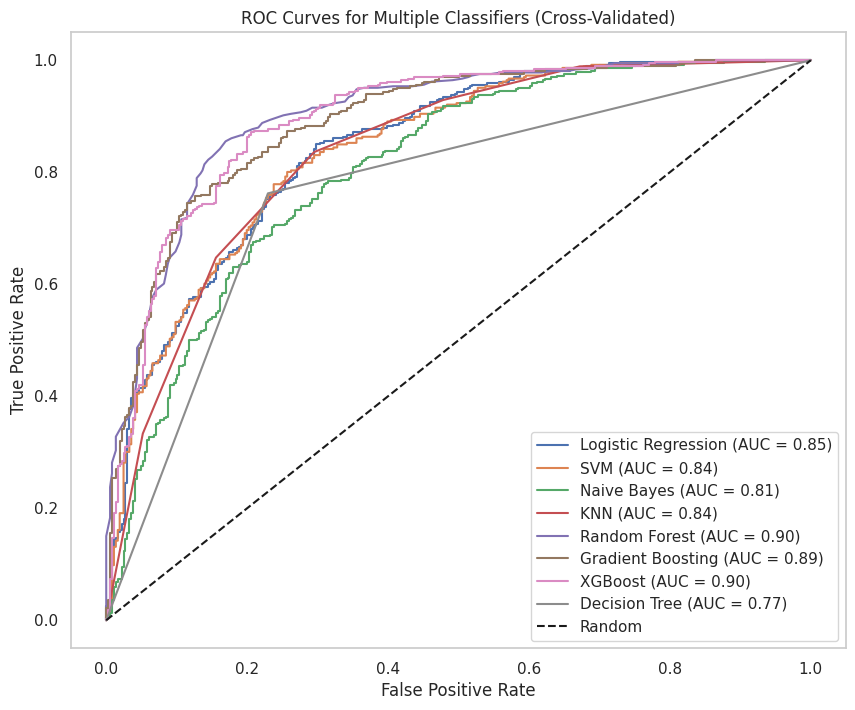

In [ ]:
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Perform cross-validation predictions with probabilities
    y_pred_proba = cross_val_predict(model, X_train_final, y_train_final, cv=kf, method="predict_proba")[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_train_final, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Classifiers (Cross-Validated)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Assuming you have X_train_final, y_train_final, X_test_final, y_test_final from previous code

# Create and train a Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
tree_classifier.fit(X_train_final, y_train_final)

# Export the decision rules as text
tree_rules = export_text(tree_classifier, feature_names=list(X_train_final.columns))

# Print the rules
print(tree_rules)